# Analisis Exploratorio del set de datos

In [1]:
#Import libraries
import pandas as pd
import numpy as np
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the Data and take a quick look
trocafone = pd.read_csv('events.csv', low_memory=False)
trocafone.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Information about the dataset
trocafone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
# Some stats about the numeric columns in our dataset
trocafone.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [5]:
# Name of columns
trocafone.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [6]:
trocafone.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [7]:
events = trocafone['event']
print(events.size == events.count())

True


In [8]:
events_vc=trocafone['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

## Eventos generados por usuarios

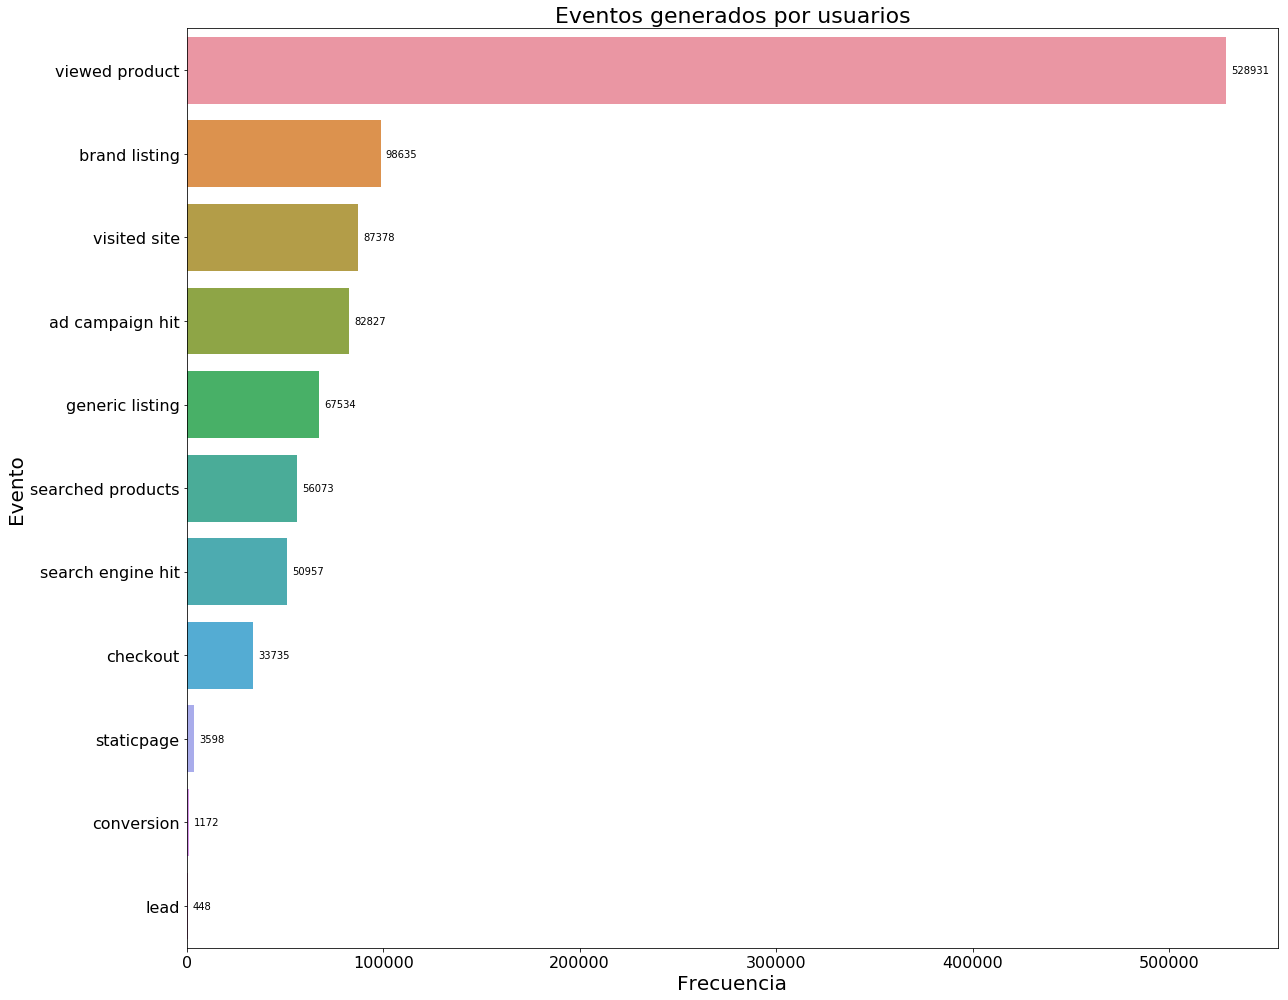

In [9]:
fig, ax = plt.subplots(figsize=(18, 14))
ax = sns.barplot(x=events_vc.values, y=events_vc.index)
ax.set_title("Eventos generados por usuarios", fontsize=22)
ax.set_xlabel("Frecuencia", fontsize=20)
ax.set_ylabel("Evento", fontsize=20)
ax.tick_params(labelsize=16)
fig.tight_layout()


rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = x_value.astype(int)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)         

# Análisis temporal

## Distribucion de eventos por hora
A continuación se analiza la cantidad de eventos ocurridos en cada hora del día.

In [10]:
# Convert Date
import calendar
trocafone['timestamp'] = pd.to_datetime(trocafone['timestamp'])
trocafone['Year']=trocafone['timestamp'].map(lambda x:x.year)
trocafone['Month'] = trocafone['timestamp'].dt.month_name()
trocafone['day_of_week'] = trocafone['timestamp'].dt.weekday_name
trocafone['day'] = trocafone['timestamp'].map(lambda x: x.day)
trocafone['Hour'] = pd.to_datetime(trocafone['timestamp'], format='%H:%M',errors='coerce').dt.hour

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

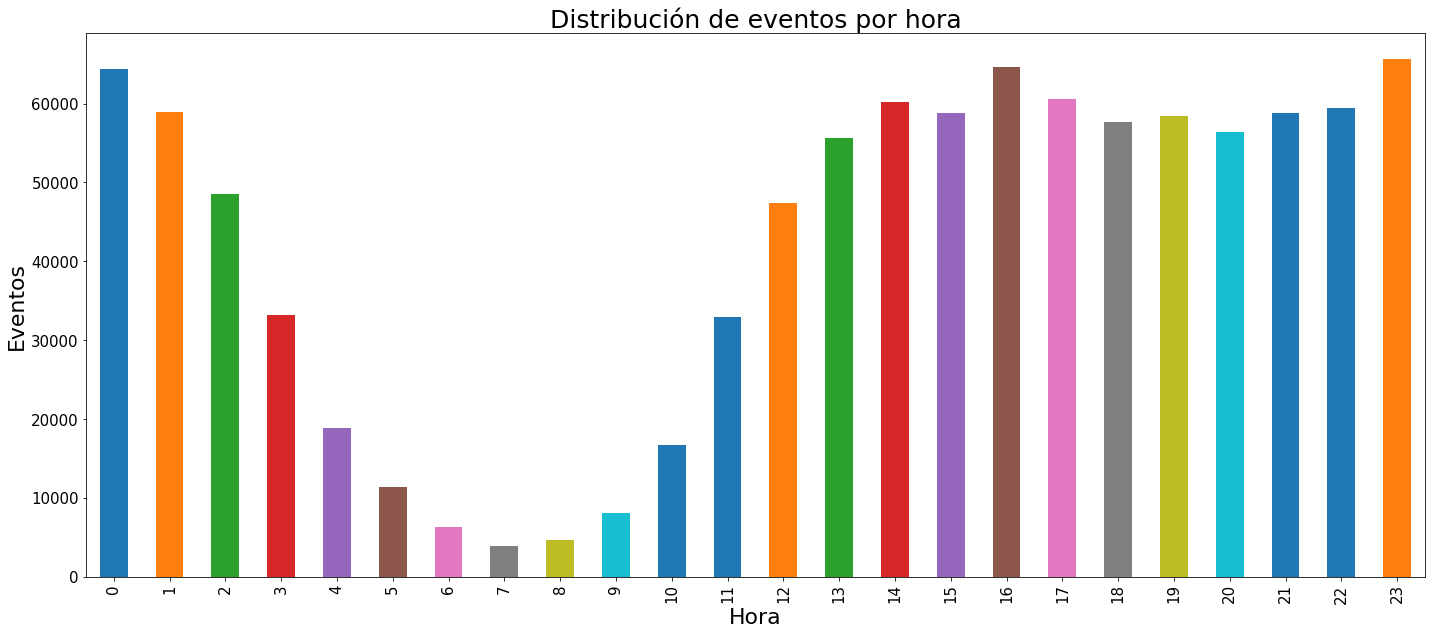

In [11]:
trocafone['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(24,10))

plt.title("Distribución de eventos por hora",fontsize='25')
plt.xlabel('Hora',fontsize='22')
plt.ylabel('Eventos',fontsize='22')
plt.xticks(range(24),size = 15)
plt.yticks(size = 15)

Como se observa, a partir de las 01:00 hay una reducción importante en la cantidad de eventos, los cuales entre las 14:00 y las 00:00 se mantienen casi constantes en valores altos. La hora con más eventos es entre las 22:00 y las 23:00.

### Tipos de eventos por hora

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

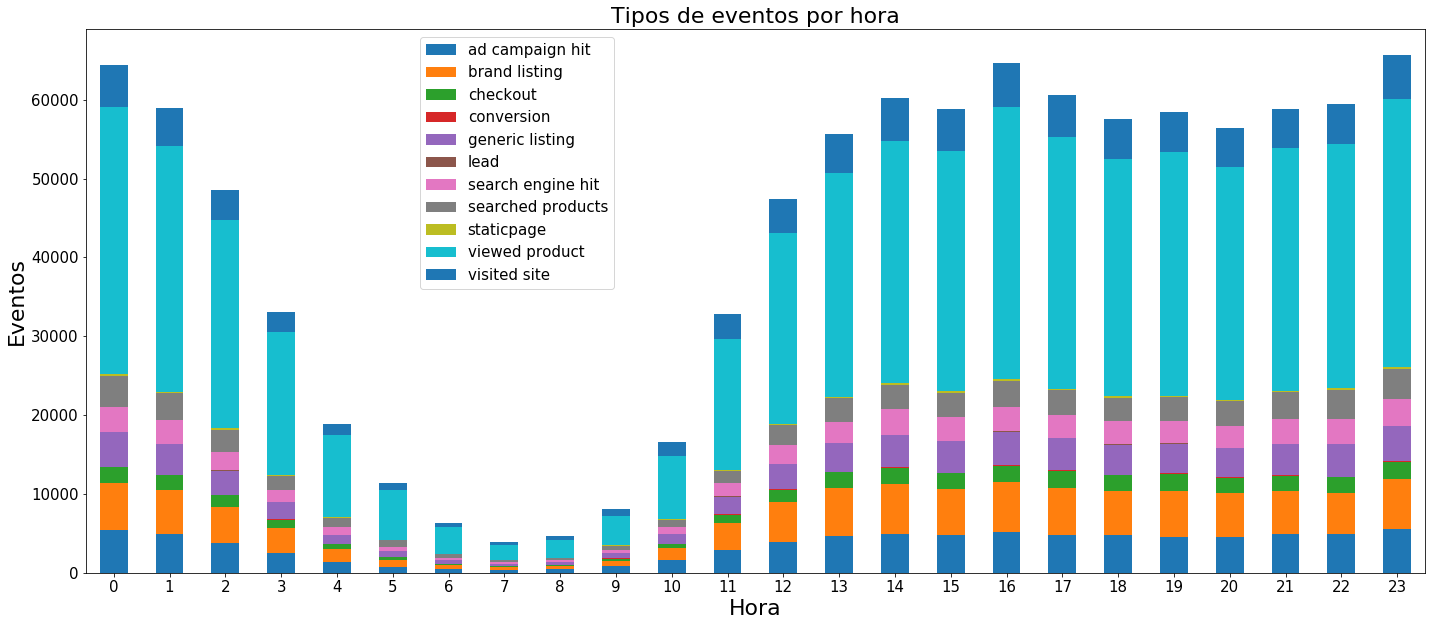

In [12]:
trocafone.groupby(['Hour','event']).size().unstack().plot(kind='bar',stacked=True,figsize=(24,10),rot=0).legend(bbox_to_anchor=(0.4, 1.00),prop={'size': 15})

plt.title("Tipos de eventos por hora",fontsize='22')
plt.xlabel('Hora',fontsize='22')
plt.ylabel('Eventos',fontsize='22')
plt.xticks(size = 15)
plt.yticks(size = 15)


### Distribucion de eventos por dia de la semana
A continuación se analizaran qué días de la semana tienen más eventos.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]), <a list of 10 Text yticklabel objects>)

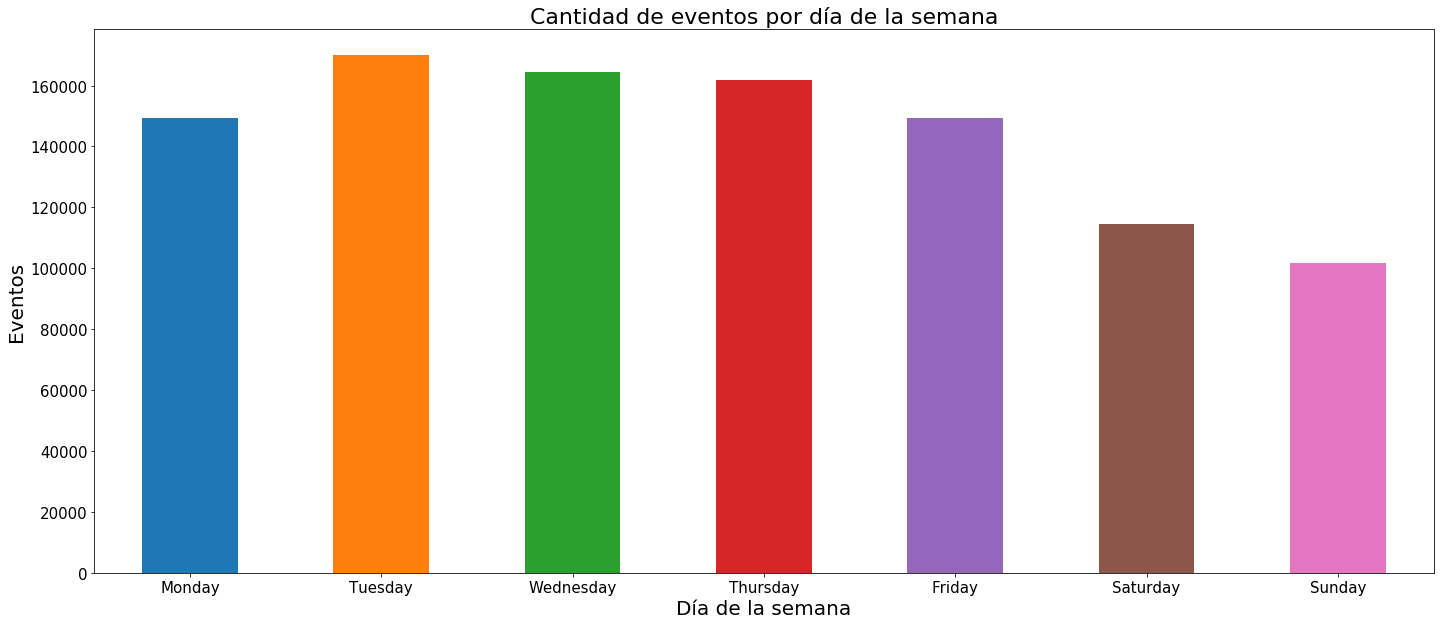

In [13]:
#Create a column with days of the week
trocafone['day_of_week'] = pd.Categorical(trocafone['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
events_by_day = trocafone['day_of_week'].value_counts().sort_index().plot(kind='bar',figsize=(24,10),rot=0)

plt.title("Cantidad de eventos por día de la semana",fontsize='22')
plt.xlabel('Día de la semana',fontsize=20)
plt.ylabel('Eventos',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [14]:
df_week=trocafone['day_of_week'].value_counts().to_frame()
promedio_semana=df_week.iloc[0:5].mean()
promedio_fin_semana=df_week.iloc[6:8].mean()
diferencia=promedio_semana-promedio_fin_semana
[promedio_semana,promedio_fin_semana, diferencia]

[day_of_week    158993.4
 dtype: float64, day_of_week    101709.0
 dtype: float64, day_of_week    57284.4
 dtype: float64]

Se observa que el día martes es el más ocupado, y a partir de ahí se reduce gradualmente la cantidad de eventos, para luego aumentar nuevamente el lunes. Es de destacar que los fines de semana hay muy poca actividad en relación a los demás días (56% menos).

### Distribución de compras por _hora del dia_ y _dia del mes_.

Continuando con el analisis temporal, se realizó un Heatmap para  evidenciar la distribución de eventos durante el mes.

In [15]:
trocafone['nonNaN'] = trocafone['event'].map(lambda x : 1) #Defino una columna para poder sumar

# llevamos a una representacion de ese tipo usando una tabla pivot.
for_heatmap = trocafone.pivot_table(index='Hour', columns='day' , values = 'nonNaN' , aggfunc = 'sum')

Text(87,0.5,'Día del mes')

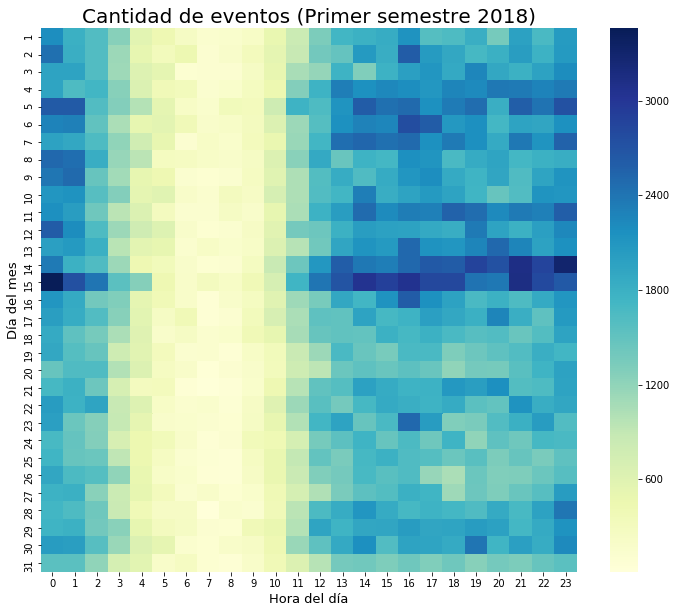

In [16]:
dims = (12, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.heatmap(for_heatmap.T , cmap="YlGnBu")
g.set_title("Cantidad de eventos (Primer semestre 2018)", fontsize=20)
g.set_xlabel("Hora del día",fontsize=13)
g.set_ylabel("Día del mes", fontsize=13)

Se puede observar un descenso en la cantidad de eventos en las horas de la mañana y un incremento particularmente interesante
en los dias 14 y 15 del mes, lo cual podría ser de utilidad a la hora de elegir la fecha para las ofertas o promociones mensuales.

### Distribucion de compras por dia de la semana
Continuando con el análisis de la sección anterior, se filtran los eventos que resultaron en compras (conversion).

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

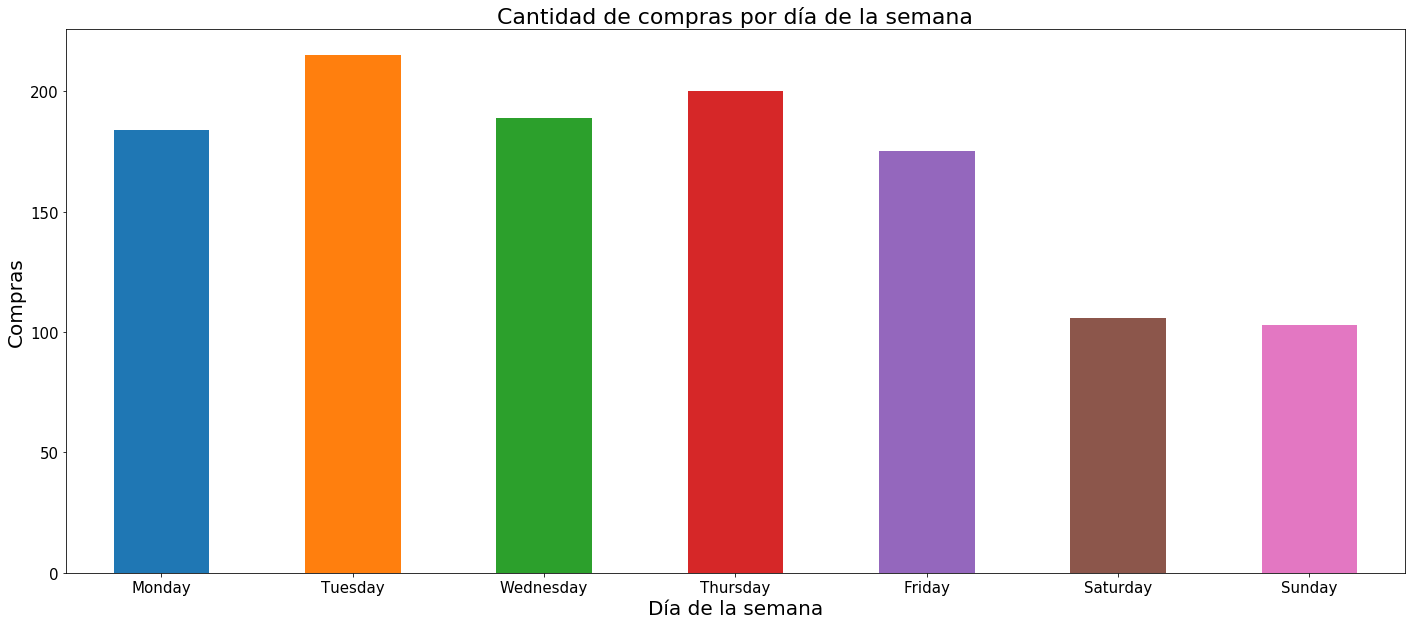

In [17]:
trocafone.loc[trocafone['event']=='conversion']['day_of_week'].value_counts().sort_index().plot(kind='bar',figsize=(24,10),rot=0)

plt.title("Cantidad de compras por día de la semana",fontsize='22')
plt.xlabel('Día de la semana',fontsize=20)
plt.ylabel('Compras',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

Se observa que la cantidad de compras mantiene la relación con la cantidad de eventos. Es por esto que los martes son los días donde hubo más compras, mientras que en los fines de semana se registraron pocas compras.

### Evolución de la cantidad de eventos a lo largo del año
Se procede a realizar un histograma mostrando la evolución en la cantidad de eventos a lo largo del año.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

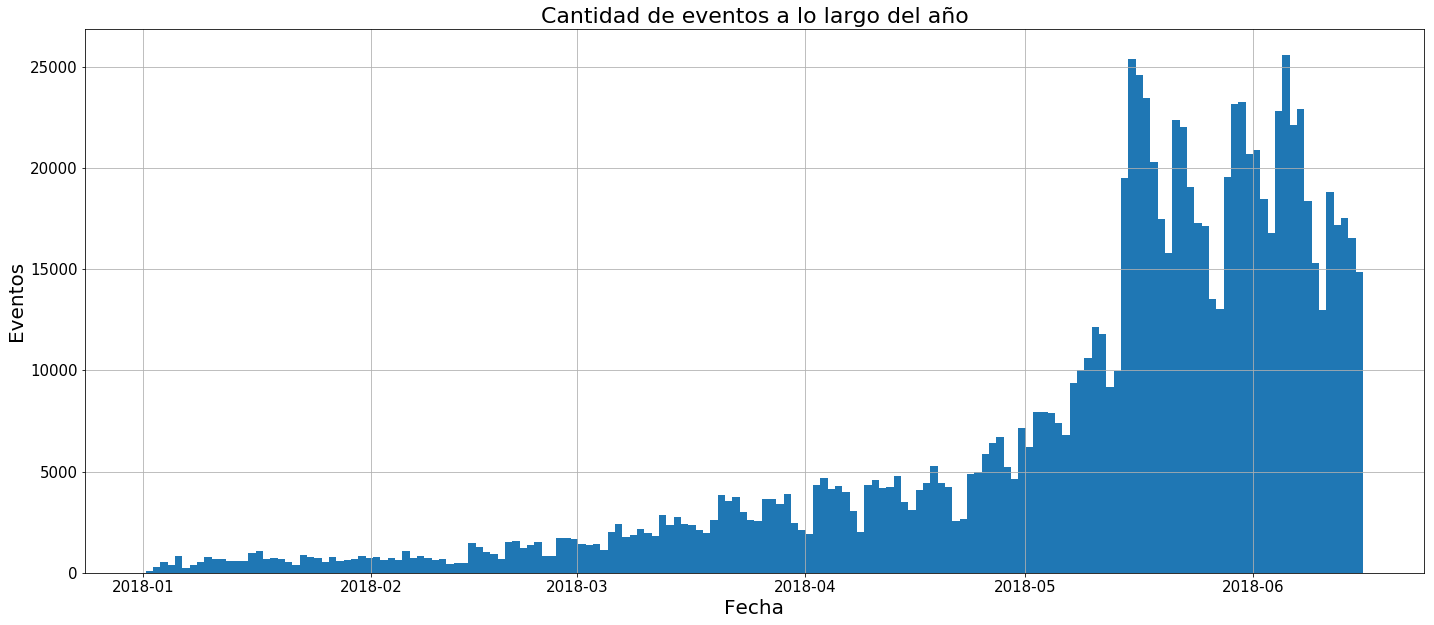

In [18]:
trocafone.sort_values(by='timestamp')['timestamp'].hist(figsize=(24,10),bins=166)

plt.title("Cantidad de eventos a lo largo del año",fontsize='22')
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('Eventos',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

A partir del gráfico se deduce que, o bien los primeros 4 meses no hubo una cantidad significativa de eventos, o estos no fueron registrados. Igualmente, En los meses de Mayo y Junio se observa un gran incremento en la cantidad de eventos, con un gran salto a mitad del mes de Mayo. Se necesitarán más datos para predecir el progreso en los futuros meses.

### Evolución de la cantidad de compras a lo largo del año

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

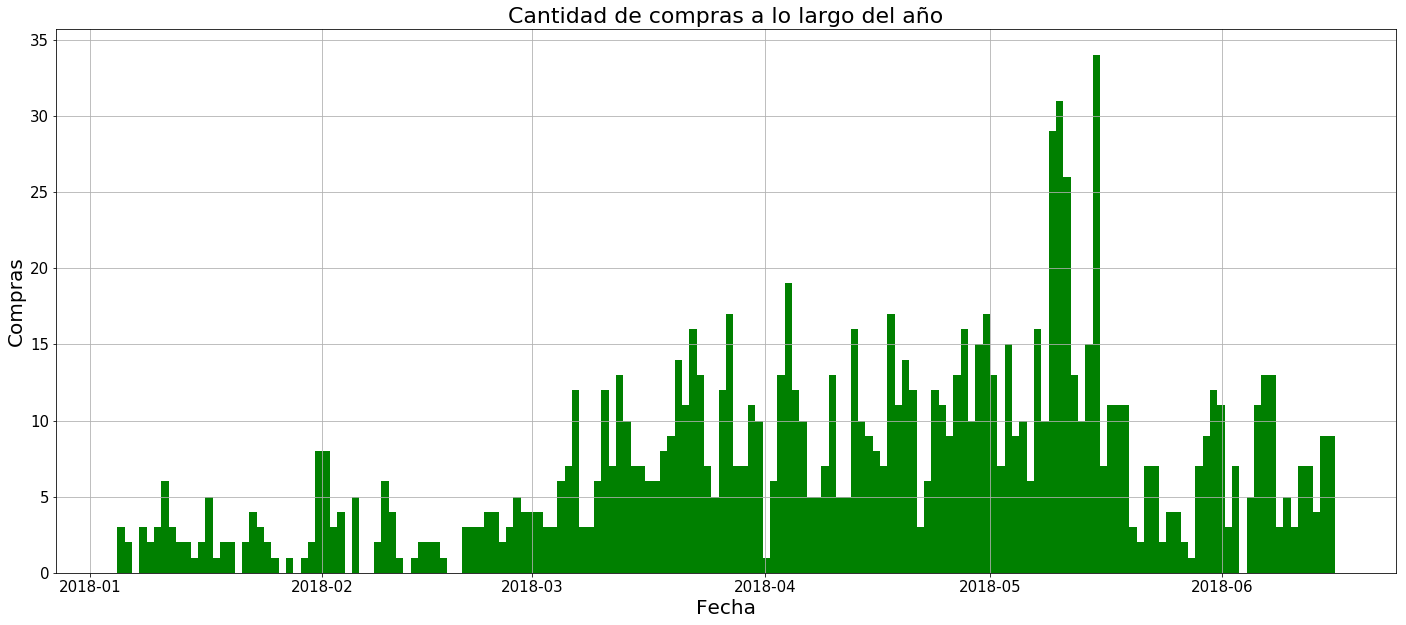

In [19]:
trocafone.loc[trocafone["event"] == "conversion"].sort_values(by='timestamp')['timestamp'].hist(figsize=(24,10),bins=166,color='green')

plt.title("Cantidad de compras a lo largo del año",fontsize='22')
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('Compras',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 ]), <a list of 9 Text yticklabel objects>)

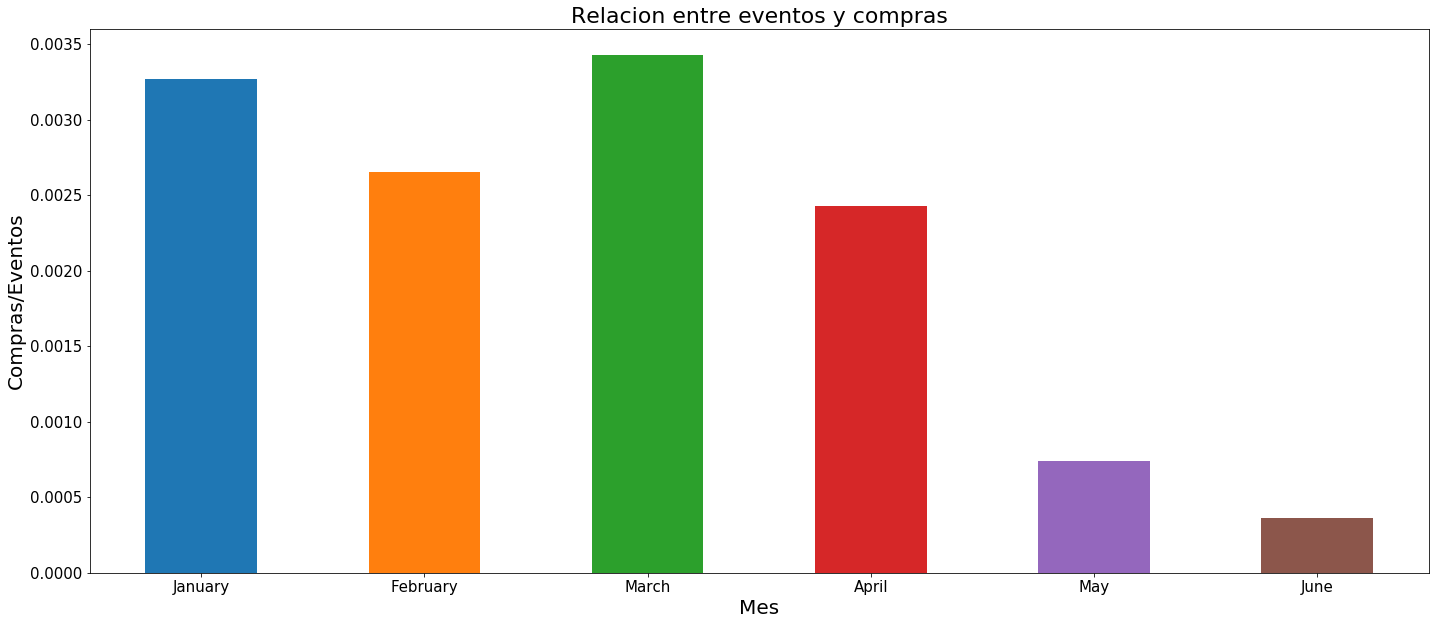

In [20]:
trocafone['Month'] = pd.Categorical(trocafone['Month'], categories=['January','February','March','April','May','June'], ordered=True)
df=trocafone.groupby('Month').size().to_frame()
df['compras']=trocafone.loc[trocafone['event']=='conversion'].groupby('Month').size()
df.columns = ['total', 'compras']
df['relacion']=df['compras']/df['total']

df['relacion'].plot(kind='bar',figsize=(24,10),rot=0)
plt.title("Relacion entre eventos y compras",fontsize='22')
plt.xlabel('Mes',fontsize=20)
plt.ylabel('Compras/Eventos',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Evolución de la cantidad de eventos a lo largo del mes

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

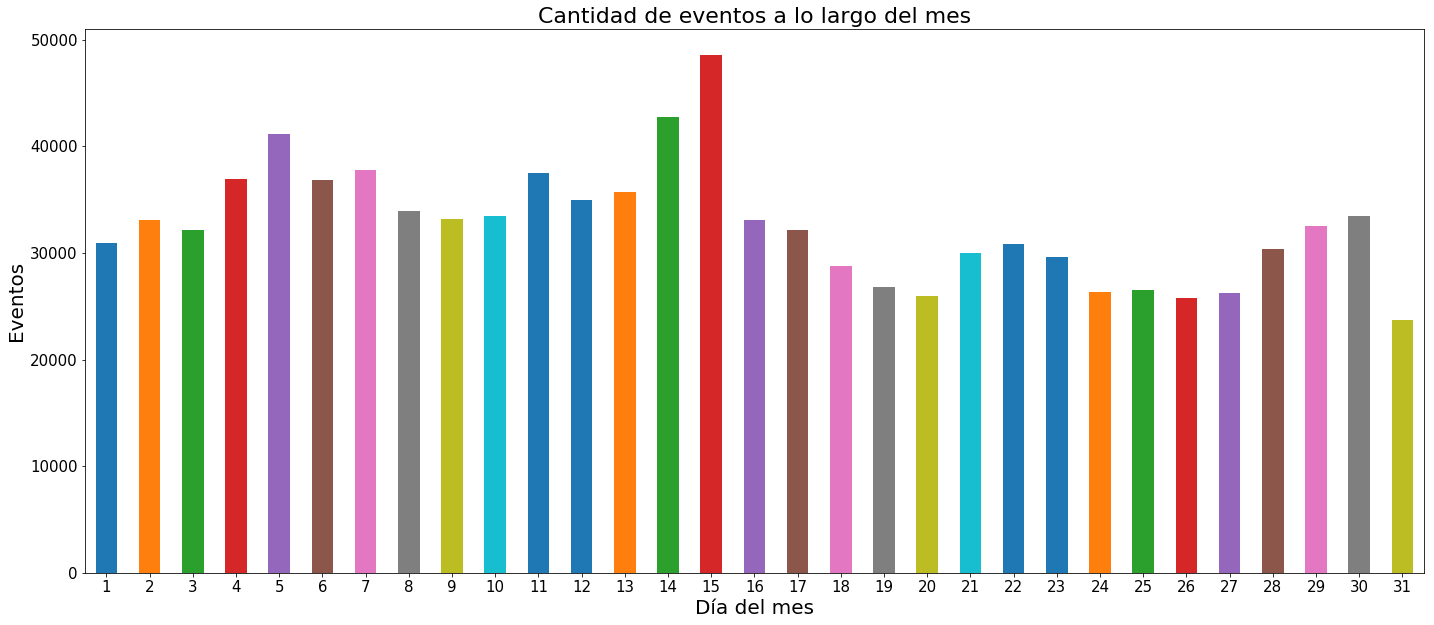

In [21]:
trocafone["day"].value_counts().sort_index().plot(kind='bar',figsize=(24,10),rot=0)

plt.title("Cantidad de eventos a lo largo del mes",fontsize='22')
plt.xlabel('Día del mes',fontsize=20)
plt.ylabel('Eventos',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

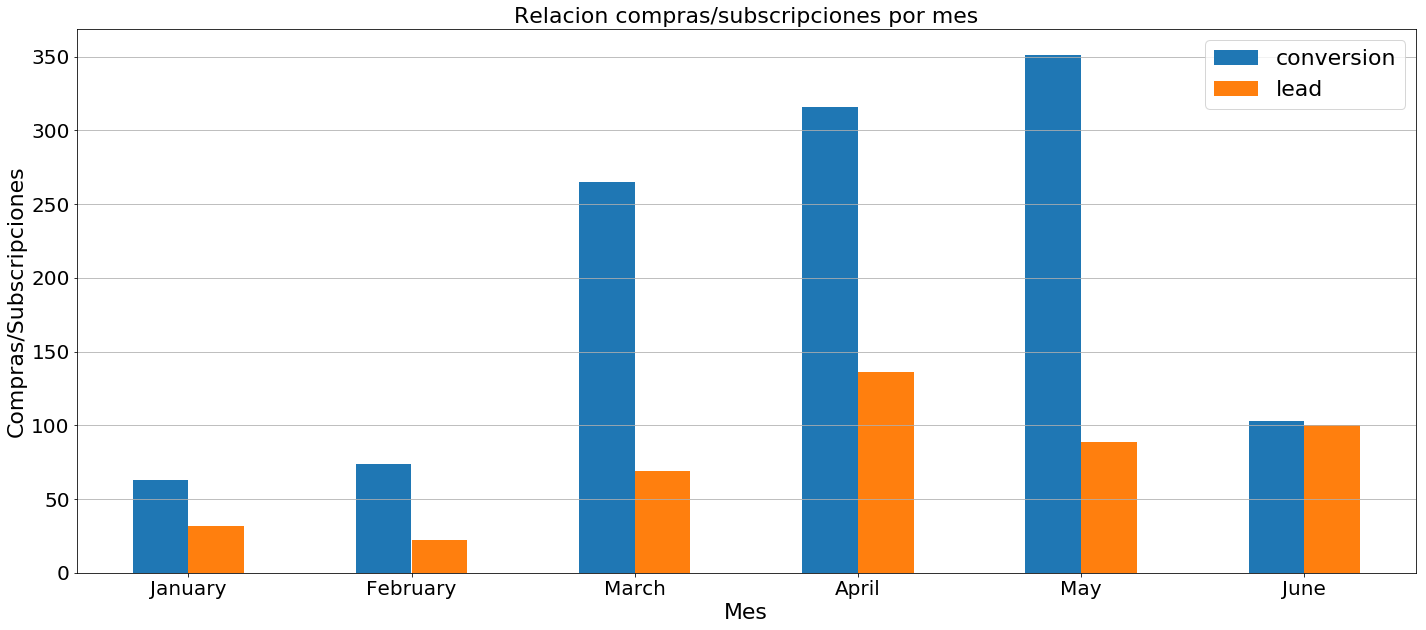

In [22]:
trocafone.loc[(trocafone['event']=='conversion') | (trocafone['event']=='lead')].groupby(['Month','event']).size().unstack().plot(kind='bar',figsize=(24,10),rot=0).legend(prop={'size': 22})

plt.title("Relacion compras/subscripciones por mes",fontsize='22')
plt.xlabel('Mes',fontsize='22')
plt.ylabel('Compras/Subscripciones',fontsize='22')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(axis='y')

## Modelos mas vendidos

In [23]:
#Top Models 
grouped = trocafone.groupby('event')
compras = grouped.get_group('conversion')
top_compras = compras['model'].value_counts().head(20)
top_compras

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G3 4G                  30
Motorola Moto G4 Plus                30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy S7                    18
Samsung Galaxy S5                    18
Samsung Galaxy Gran Prime 3G Duos    18
iPhone 5                             17
Samsung Galaxy S7 Edge               17
Motorola Moto G2 3G Dual             17
Samsung Galaxy S3 Mini               17
Name: model, dtype: int64

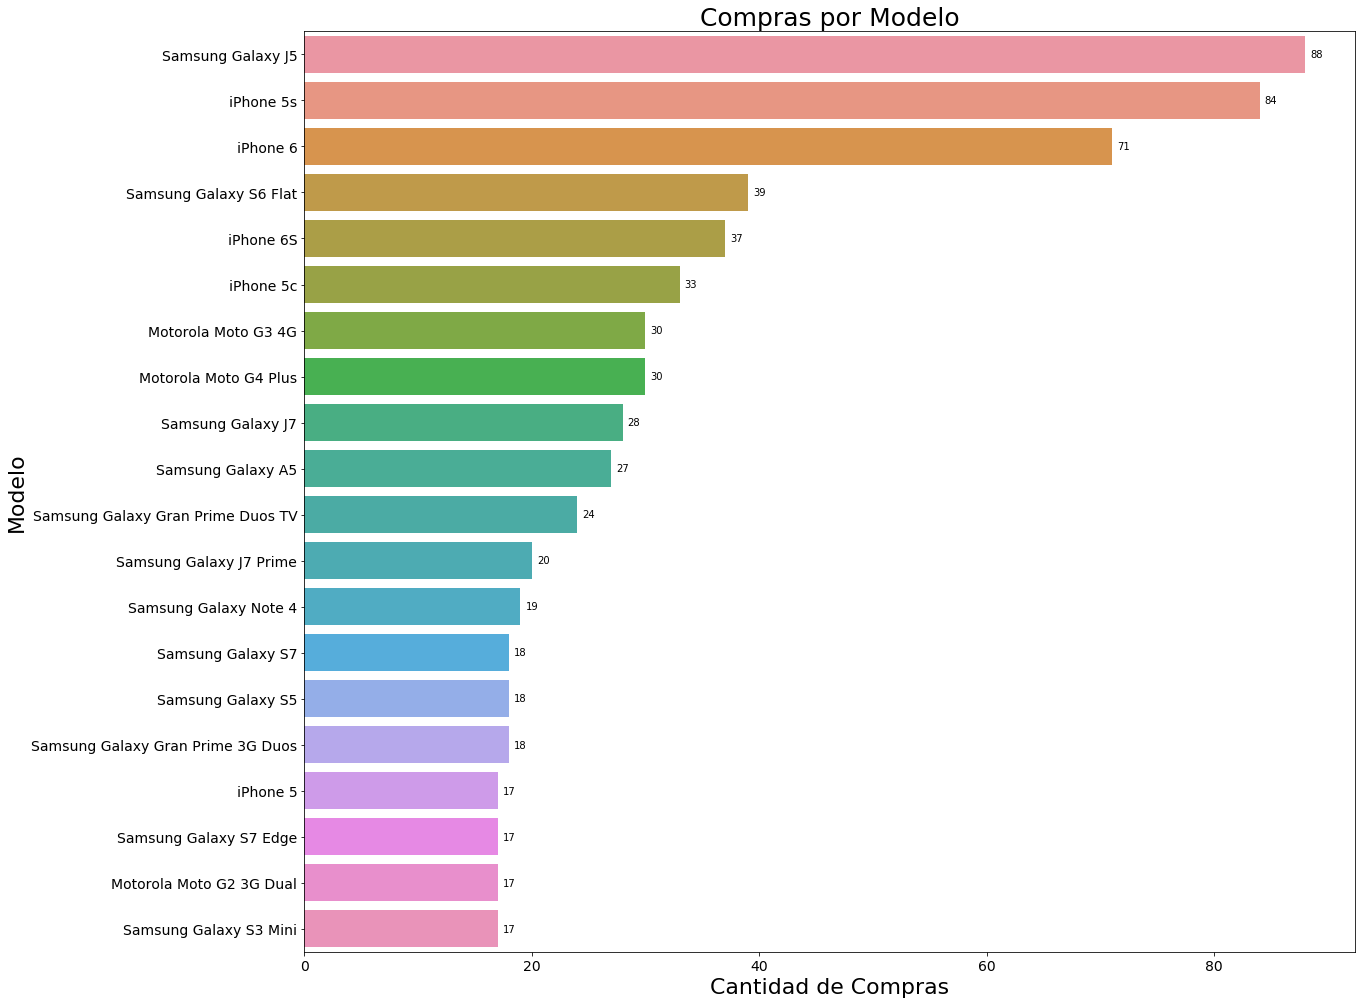

In [24]:
fig, ax = plt.subplots(figsize=(18, 14))
ax = sns.barplot(x = top_compras.values , y = top_compras.index)
ax.set_title("Compras por Modelo", fontsize=25)
ax.set_xlabel("Cantidad de Compras", fontsize=22)
ax.set_ylabel("Modelo", fontsize=22)
fig.tight_layout()
ax.tick_params(labelsize=14)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = x_value.astype(int)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)  

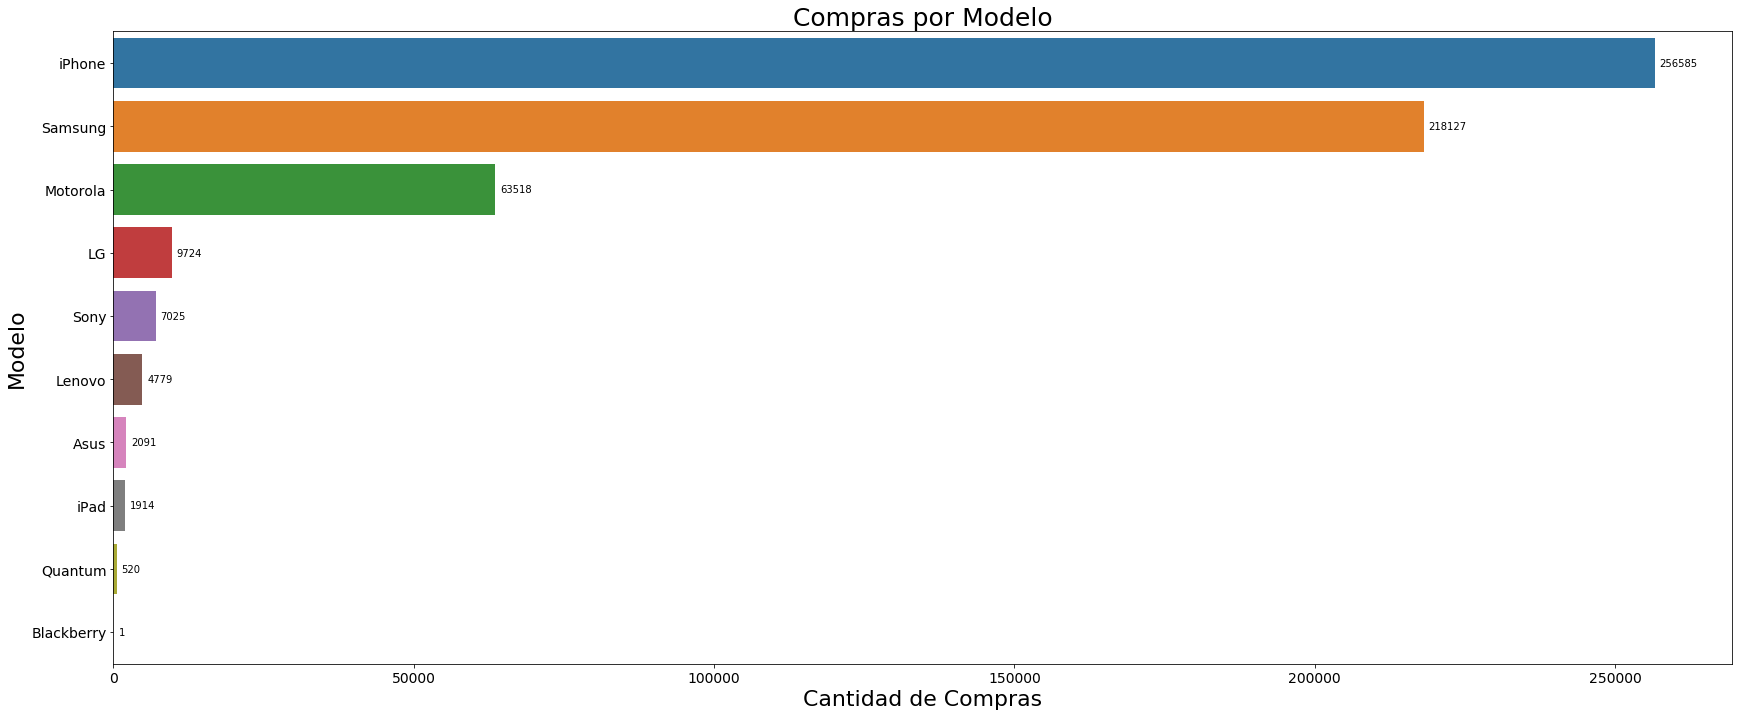

In [25]:
celulares=trocafone['model'].dropna().str.split().str.get(0)
celulares=celulares.value_counts()

fig, ax = plt.subplots(figsize=(24, 10))
ax = sns.barplot(x = celulares.values , y = celulares.index)
ax.set_title("Compras por Modelo", fontsize=25)
ax.set_xlabel("Cantidad de Compras", fontsize=22)
ax.set_ylabel("Modelo", fontsize=22)
fig.tight_layout()
ax.tick_params(labelsize=14)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = x_value.astype(int)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)

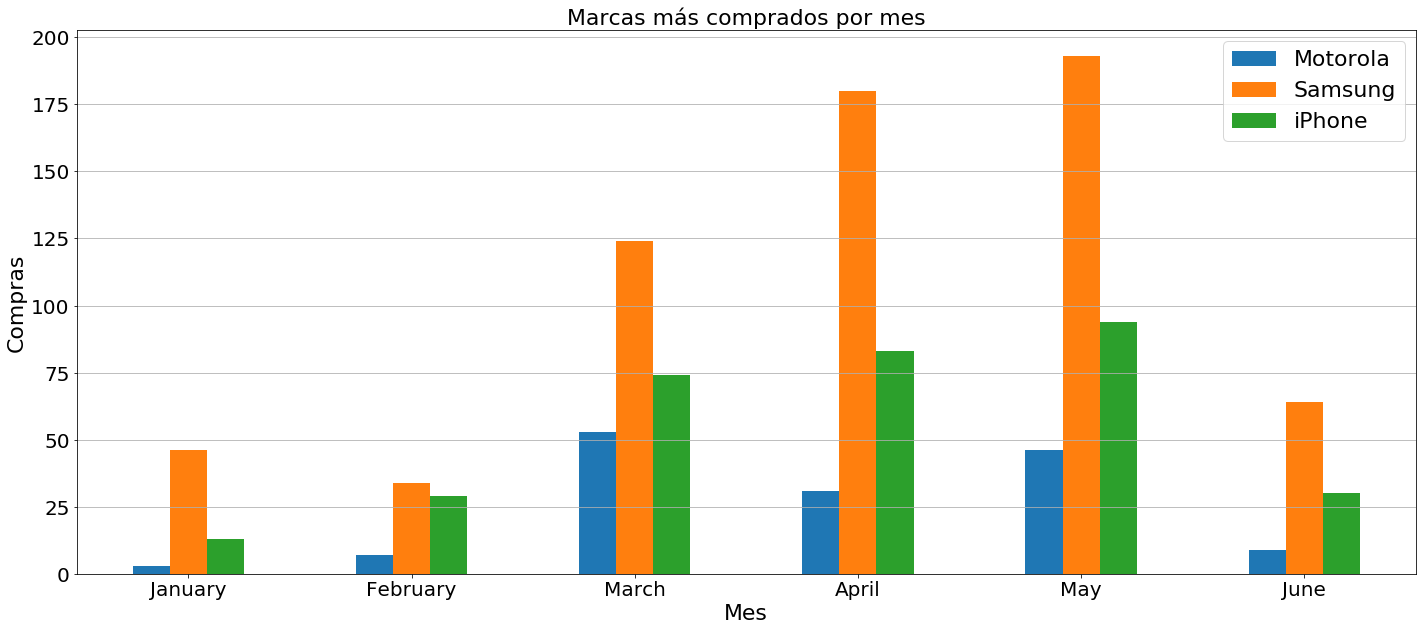

In [26]:
trocafone['marcaCel'] =trocafone['model'].dropna().str.split().str.get(0)

df=trocafone.loc[(trocafone['event']=='conversion')].groupby(['Month','marcaCel']).size().unstack()
df.drop([col for col, val in df.sum().iteritems() if val < 50], axis=1, inplace=True)
df.plot(kind='bar',figsize=(24,10),rot=0).legend(prop={'size': 22})

plt.title("Marcas más comprados por mes",fontsize='22')
plt.xlabel('Mes',fontsize='22')
plt.ylabel('Compras',fontsize='22')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(axis='y')

### Cantidad de eventos por tipo de dispositivo

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text yticklabel objects>)

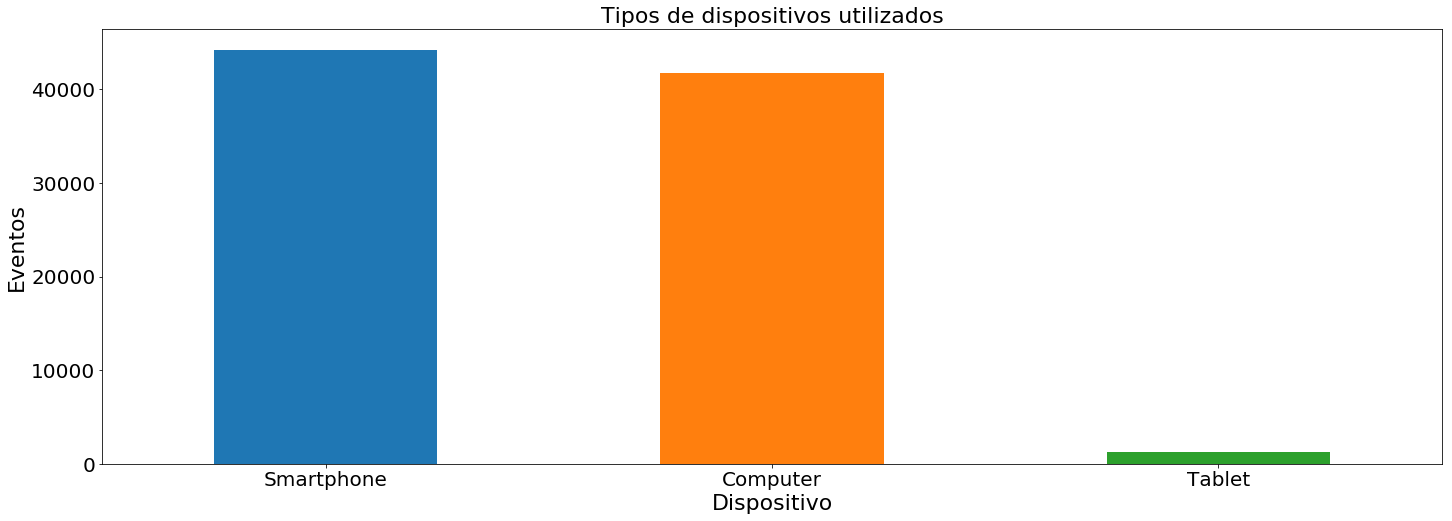

In [27]:
device_types=trocafone[(trocafone['device_type']!='Unknown') & (trocafone['device_type'].notnull())]
device_types['device_type'].value_counts().plot(kind='bar',rot=0,figsize=(24,8)) 
plt.xlabel('Dispositivo',fontsize='22')
plt.ylabel('Eventos',fontsize='22')
plt.title("Tipos de dispositivos utilizados",fontsize='22')
plt.xticks(size = 20)
plt.yticks(size = 20)

In [28]:
device_types['event'].nunique()
#No hay datos sobre tipos de dispositivos con otros eventos

1

# Analisis Geografico

### Paises con mas usuarios

In [29]:
countries = trocafone.loc[trocafone["country"] != "Unknown"]
countries = countries.drop_duplicates(subset=['person', 'country'])
countries = countries["country"].value_counts().to_frame("cantidad")
countries.index.title = "pais"
countries = countries.assign(porcentaje=countries/countries.sum()*100)
countries.head(10)

,cantidad,porcentaje
Brazil,25872,98.215777
United States,322,1.222383
Argentina,25,0.094905
Canada,20,0.075924
France,10,0.037962
Netherlands,10,0.037962
Mozambique,9,0.034166
United Kingdom,8,0.030370
Portugal,7,0.026574
Italy,5,0.018981


### Ciudades con mas usuarios

In [30]:
cities = trocafone.loc[trocafone["city"] != "Unknown"]
cities = cities.drop_duplicates(subset=['person', 'city'])
cities = cities["city"].value_counts().to_frame("cantidad")
cities.index.title = "ciudad"
cities = cities.assign(porcentaje=cities/cities.sum()*100)
cities.head(10)

,cantidad,porcentaje
São Paulo,4297,14.783596
Rio de Janeiro,1379,4.744375
Belo Horizonte,938,3.227138
Salvador,932,3.206496
Brasília,535,1.840639
Curitiba,441,1.517237
Fortaleza,429,1.475951
Osasco,403,1.386500
Recife,386,1.328012
Porto Alegre,375,1.290167


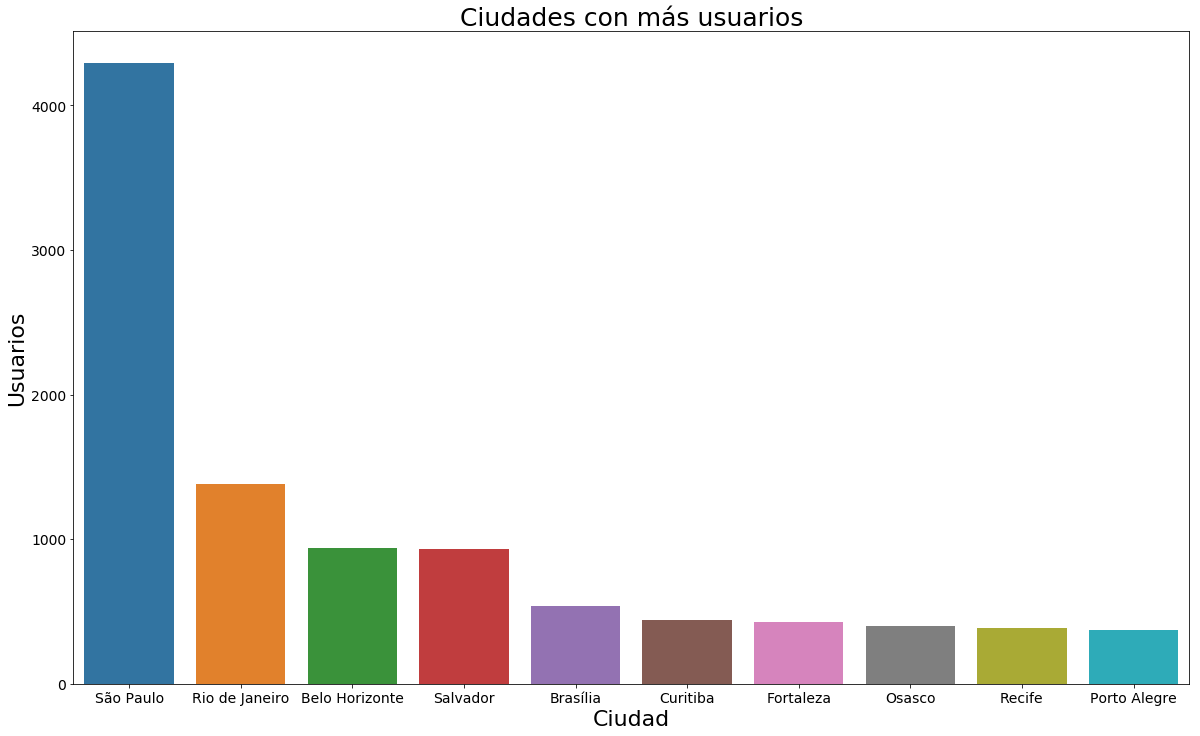

In [31]:
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.barplot(x=cities.head(10).index, y=cities.head(10)["cantidad"])
ax.set_title("Ciudades con más usuarios", fontsize=25)
ax.set_xlabel("Ciudad", fontsize=22)
ax.set_ylabel("Usuarios", fontsize=22)
ax.tick_params(labelsize=14)

### Ciudades con mas eventos

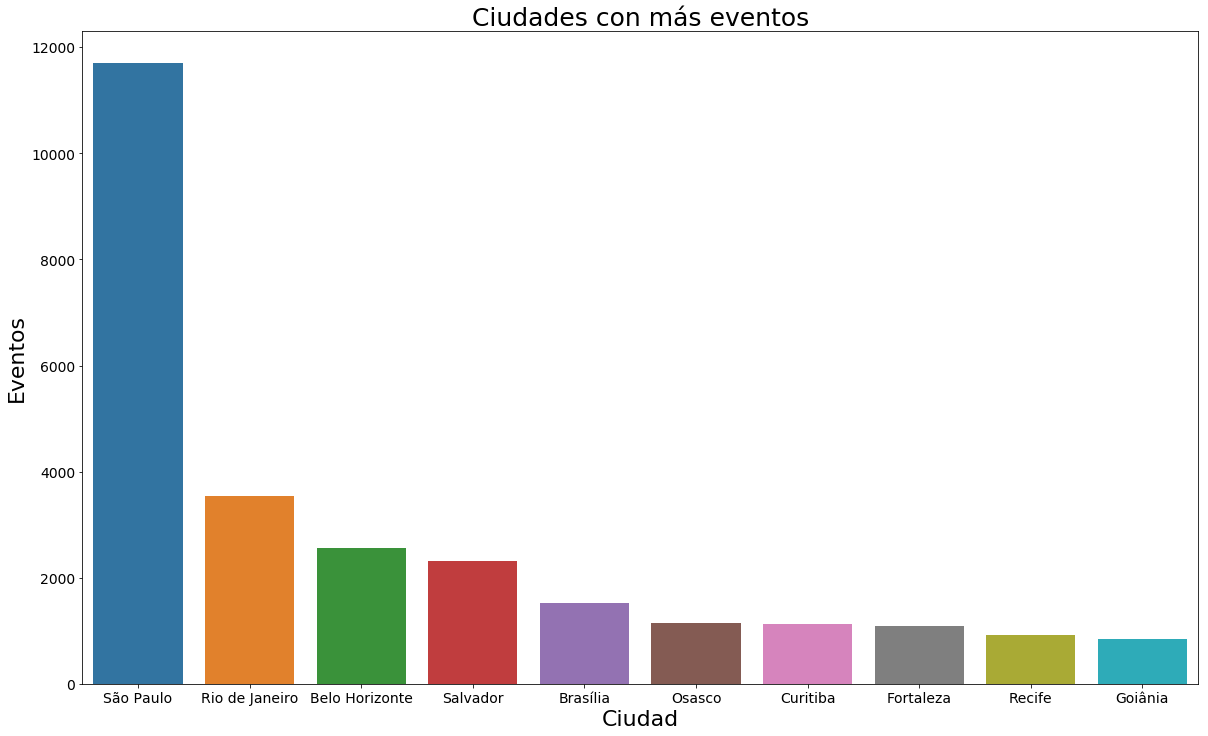

In [32]:
cities = trocafone.loc[trocafone["city"] != "Unknown"]
cities = cities["city"].value_counts().to_frame("frecuencia")
cities.index.title = "ciudad"
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.barplot(x=cities.head(10).index, y=cities.head(10)["frecuencia"])
ax.set_title("Ciudades con más eventos", fontsize=25)
ax.set_xlabel("Ciudad", fontsize=22)
ax.set_ylabel("Eventos", fontsize=22)
ax.tick_params(labelsize=14)

### Paises con mas eventos

In [33]:
countries = trocafone.loc[trocafone["country"] != "Unknown"]
countries = countries["country"].value_counts().to_frame("cantidad")
countries.index.title = "pais"
countries = countries.assign(porcentaje=countries/countries.sum()*100)
countries.head(10)

,cantidad,porcentaje
Brazil,84308,99.110092
United States,465,0.546641
Argentina,94,0.110504
Canada,35,0.041145
Netherlands,13,0.015282
France,13,0.015282
United Kingdom,12,0.014107
Mozambique,12,0.014107
Japan,11,0.012931
Poland,9,0.010580


In [34]:
cities_loc = pd.read_csv("coordinates.csv")
cities_loc = cities_loc.dropna()

In [35]:
import folium

cm = plt.get_cmap("winter")

folium_map = folium.Map(tiles="Mapbox Bright", location=(0,0), zoom_start=2.47)

for city in cities_loc.values:
    marker = folium.CircleMarker(location=[city[2], city[3]], radius=1, color='red', opacity=0.5)
    marker.add_to(folium_map)
folium_map.zoom_control = False
folium_map

# Analisis del usuario

### Cantidad de eventos por usuario

In [36]:
eventos_por_persona = trocafone.groupby('person')['event'].count()
max = eventos_por_persona.max()
min = eventos_por_persona.min()
promedio = eventos_por_persona.mean()
media = eventos_por_persona.median()
std = eventos_por_persona.std()
d = {"promedio":promedio, "media":media, "std":std, "max":max, "min":min}
pd.DataFrame(data=d, index=["eventos por persona"])

,promedio,media,std,max,min
eventos por persona,36.609036,14.0,80.595628,2771,1


## Navegadores preferidos

In [37]:
browser=trocafone['browser_version'].dropna().str.replace('\d+', '').str.replace('.', '')
browser_df=browser.value_counts().to_frame()
browser_df['percentages']=browser_df['browser_version']/browser_df['browser_version'].sum()*100
browser_df

,browser_version,percentages
Chrome,38081,43.581908
Chrome Mobile,36780,42.092975
Mobile Safari,3230,3.696583
Firefox,2566,2.936666
Samsung Internet,1699,1.944425
Facebook,1415,1.619401
Edge,893,1.021996
Opera,608,0.695827
IE,398,0.455492
Android,347,0.397125


(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text yticklabel objects>)

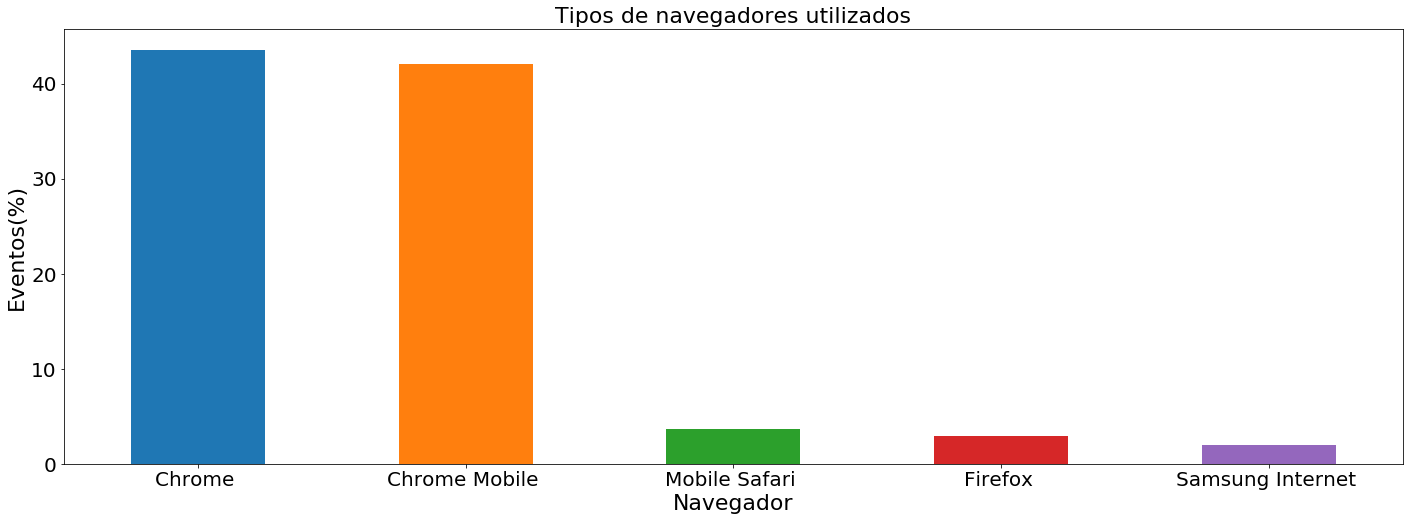

In [38]:
browser_df['percentages'].head(5).plot(kind='bar',rot=0,figsize=(24,8)) 

plt.title("Tipos de navegadores utilizados",fontsize='22')
plt.xlabel('Navegador',fontsize='22')
plt.ylabel('Eventos(%)',fontsize='22')
plt.xticks(size = 20)
plt.yticks(size = 20)

## Analisis de usuarios que compran

### Cantidad de personas que compraron

In [39]:
trocafone.loc[trocafone['event']=='conversion']['person'].nunique()

716

### Promedio de visitas de personas que compran

In [40]:
compras=trocafone.loc[trocafone['event']=='conversion'].groupby('person')
compras.size().mean()

1.6368715083798884

### Máximo de compras de una persona

In [41]:
compras.size().max()

15

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

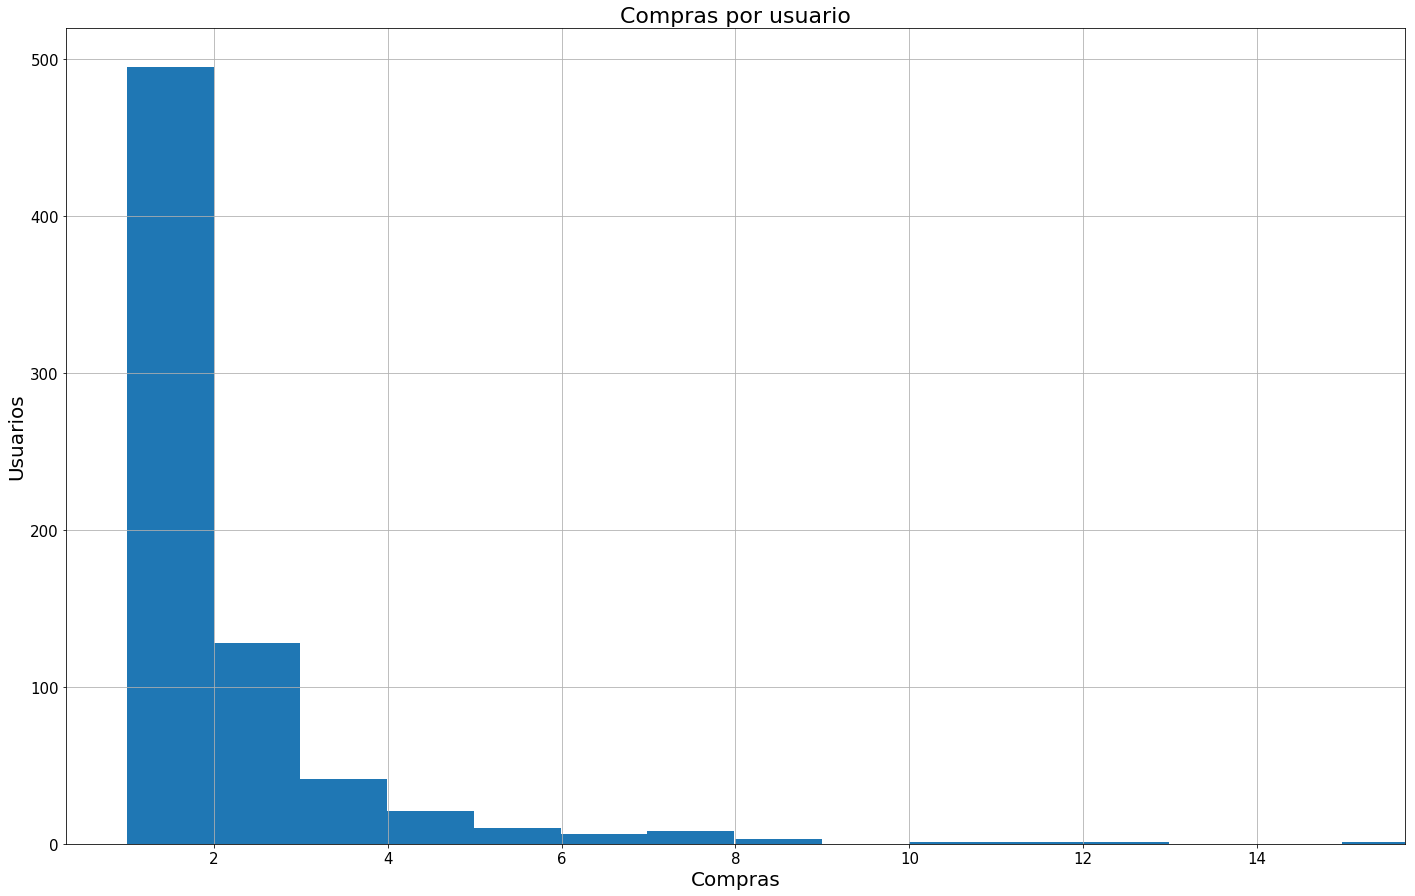

In [42]:
compras.size().hist(figsize=(24,15),bins=716,width=1)

plt.title("Compras por usuario",fontsize='22')
plt.xlabel('Compras',fontsize=20)
plt.ylabel('Usuarios',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Porcentaje de usuarios que realizaron solo una compra

In [43]:
(compras.size()==1).sum()/len(compras)*100

69.1340782122905

### Cantidad de personas que realizaron ckeckouts

In [44]:
checkouts=trocafone.loc[trocafone['event']=='checkout'].groupby('person')
len(checkouts)

27624

### Promedio de checkouts por persona

In [45]:
checkouts.size().mean()

1.22122067767159

### Relación entre personas que hicieron checkouts y personas que compraron (%)

In [46]:
len(compras)/len(checkouts)*100

2.591949029829134

### Relación entre total de checkouts y total de compras (%)

In [47]:
total_checkouts=trocafone.loc[trocafone['event']=='checkout']
len(total_checkouts)

33735

In [48]:
total_compras=trocafone.loc[trocafone['event']=='conversion']
len(total_compras)

1172

In [49]:
len(total_compras)/len(total_checkouts)*100

3.4741366533274047

### Cantidad de productos vistos por persona

In [50]:
vistos_por_persona = trocafone.loc[trocafone['event'] == 'viewed product'].groupby('person')['sku'].nunique()
max = vistos_por_persona.max()
min = vistos_por_persona.min()
promedio = vistos_por_persona.mean()
media = vistos_por_persona.median()
std = vistos_por_persona.std()
d = {"promedio":promedio, "media":media, "std":std, "max":max, "min":min}
pd.DataFrame(data=d, index=["productos vistos por persona"])

,promedio,media,std,max,min
productos vistos por persona,11.242362,4.0,21.306081,552,1


### Usuarios nuevos

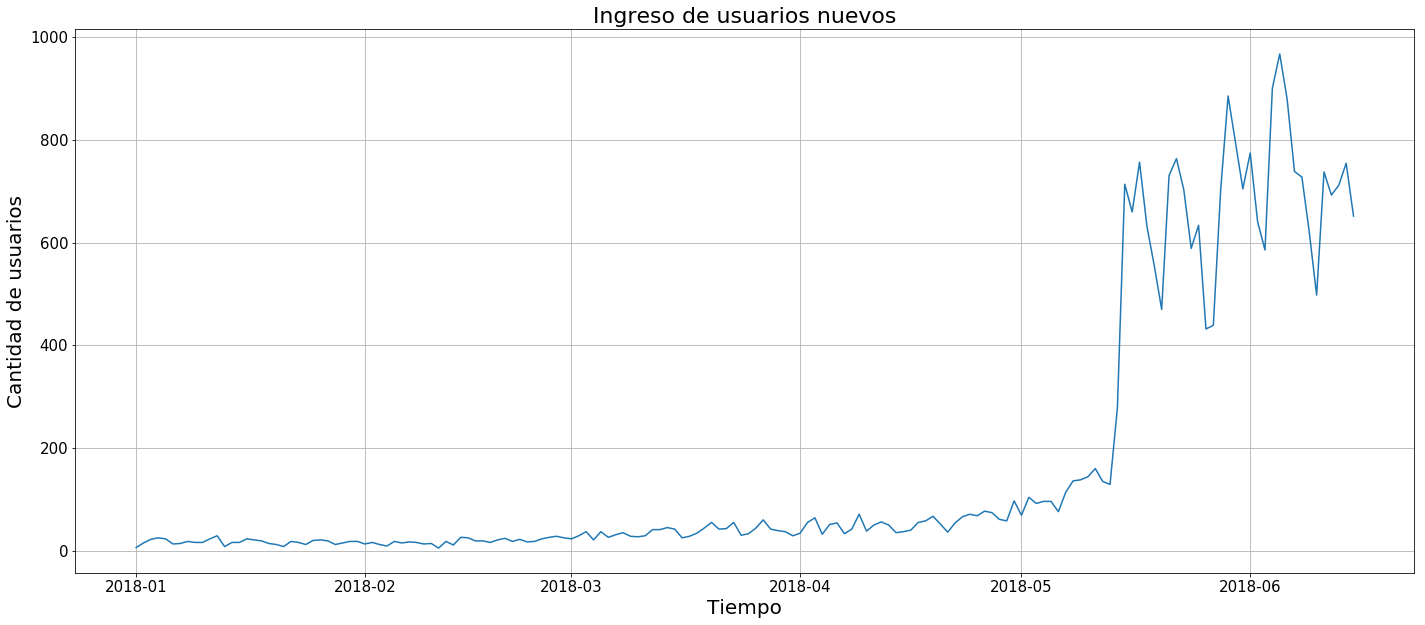

In [51]:
primeros_ingresos = trocafone.groupby(['person'])['timestamp'].min().to_frame()
primeros_ingresos['timestamp'] = primeros_ingresos['timestamp'].map(lambda x: x.date())
primeros_ingresos_por_dia = primeros_ingresos.groupby('timestamp').agg('size')
primeros_ingresos_por_dia.plot(figsize=(24,10))
plt.title("Ingreso de usuarios nuevos",fontsize='22')
plt.xlabel('Tiempo',fontsize=20)
plt.ylabel('Cantidad de usuarios',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 
plt.grid()

### Proporcion de usuarios que ingresan por un buscador (%)

In [52]:
buscadores = trocafone.loc[trocafone['event'] == 'search engine hit']
buscadores.index.size / trocafone.index.size * 100

5.0388217797501795

#### Buscadores mas utilizados

In [53]:
frec_buscadores = buscadores['search_engine'].value_counts().to_frame('frecuencia')
frec_buscadores.index.title = 'Buscador'
frec_buscadores['porcentaje'] = buscadores['search_engine'].value_counts(normalize=True)*100
frec_buscadores

,frecuencia,porcentaje
Google,50240,98.592931
Bing,424,0.832074
Yahoo,287,0.563220
Ask,6,0.011775


### Usuarios que ingresan por una campaña publicitaria (%)

In [54]:
publicidad = trocafone.loc[trocafone['event'] == 'ad campaign hit']
publicidad.index.size / trocafone.index.size * 100

8.190248475211808

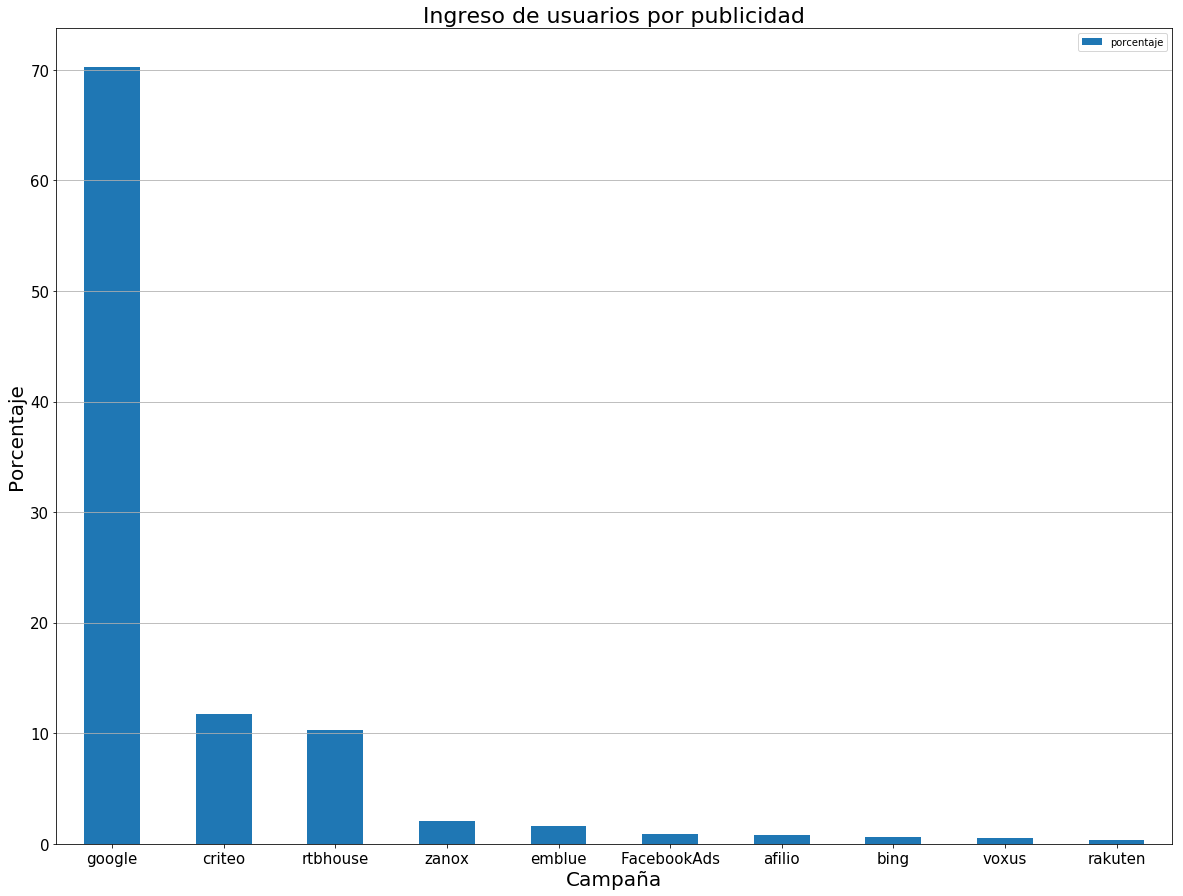

In [55]:
frec_publicidad = publicidad['campaign_source'].value_counts(normalize=True).to_frame('porcentaje')
frec_publicidad.index.title = 'Buscador'
frec_publicidad['porcentaje'] = frec_publicidad['porcentaje']*100
frec_publicidad.head(10).plot(kind='bar', figsize=(20, 15),rot=0)
plt.title("Ingreso de usuarios por publicidad",fontsize='22')
plt.xlabel('Campaña',fontsize=20)
plt.ylabel('Porcentaje',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 
plt.grid(axis='y')